In [11]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
url = 'https://raw.githubusercontent.com/ghego/zero_to_deep_learning_video/master/data/diabetes.csv'

df = pd.read_csv(url)


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025CBECA7400>,
      dtype=object)

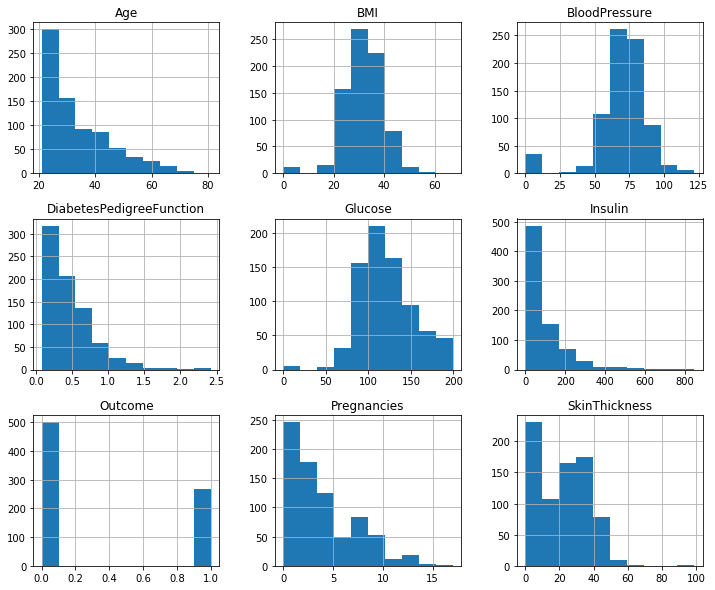

In [9]:
df.hist(figsize=(12, 10))

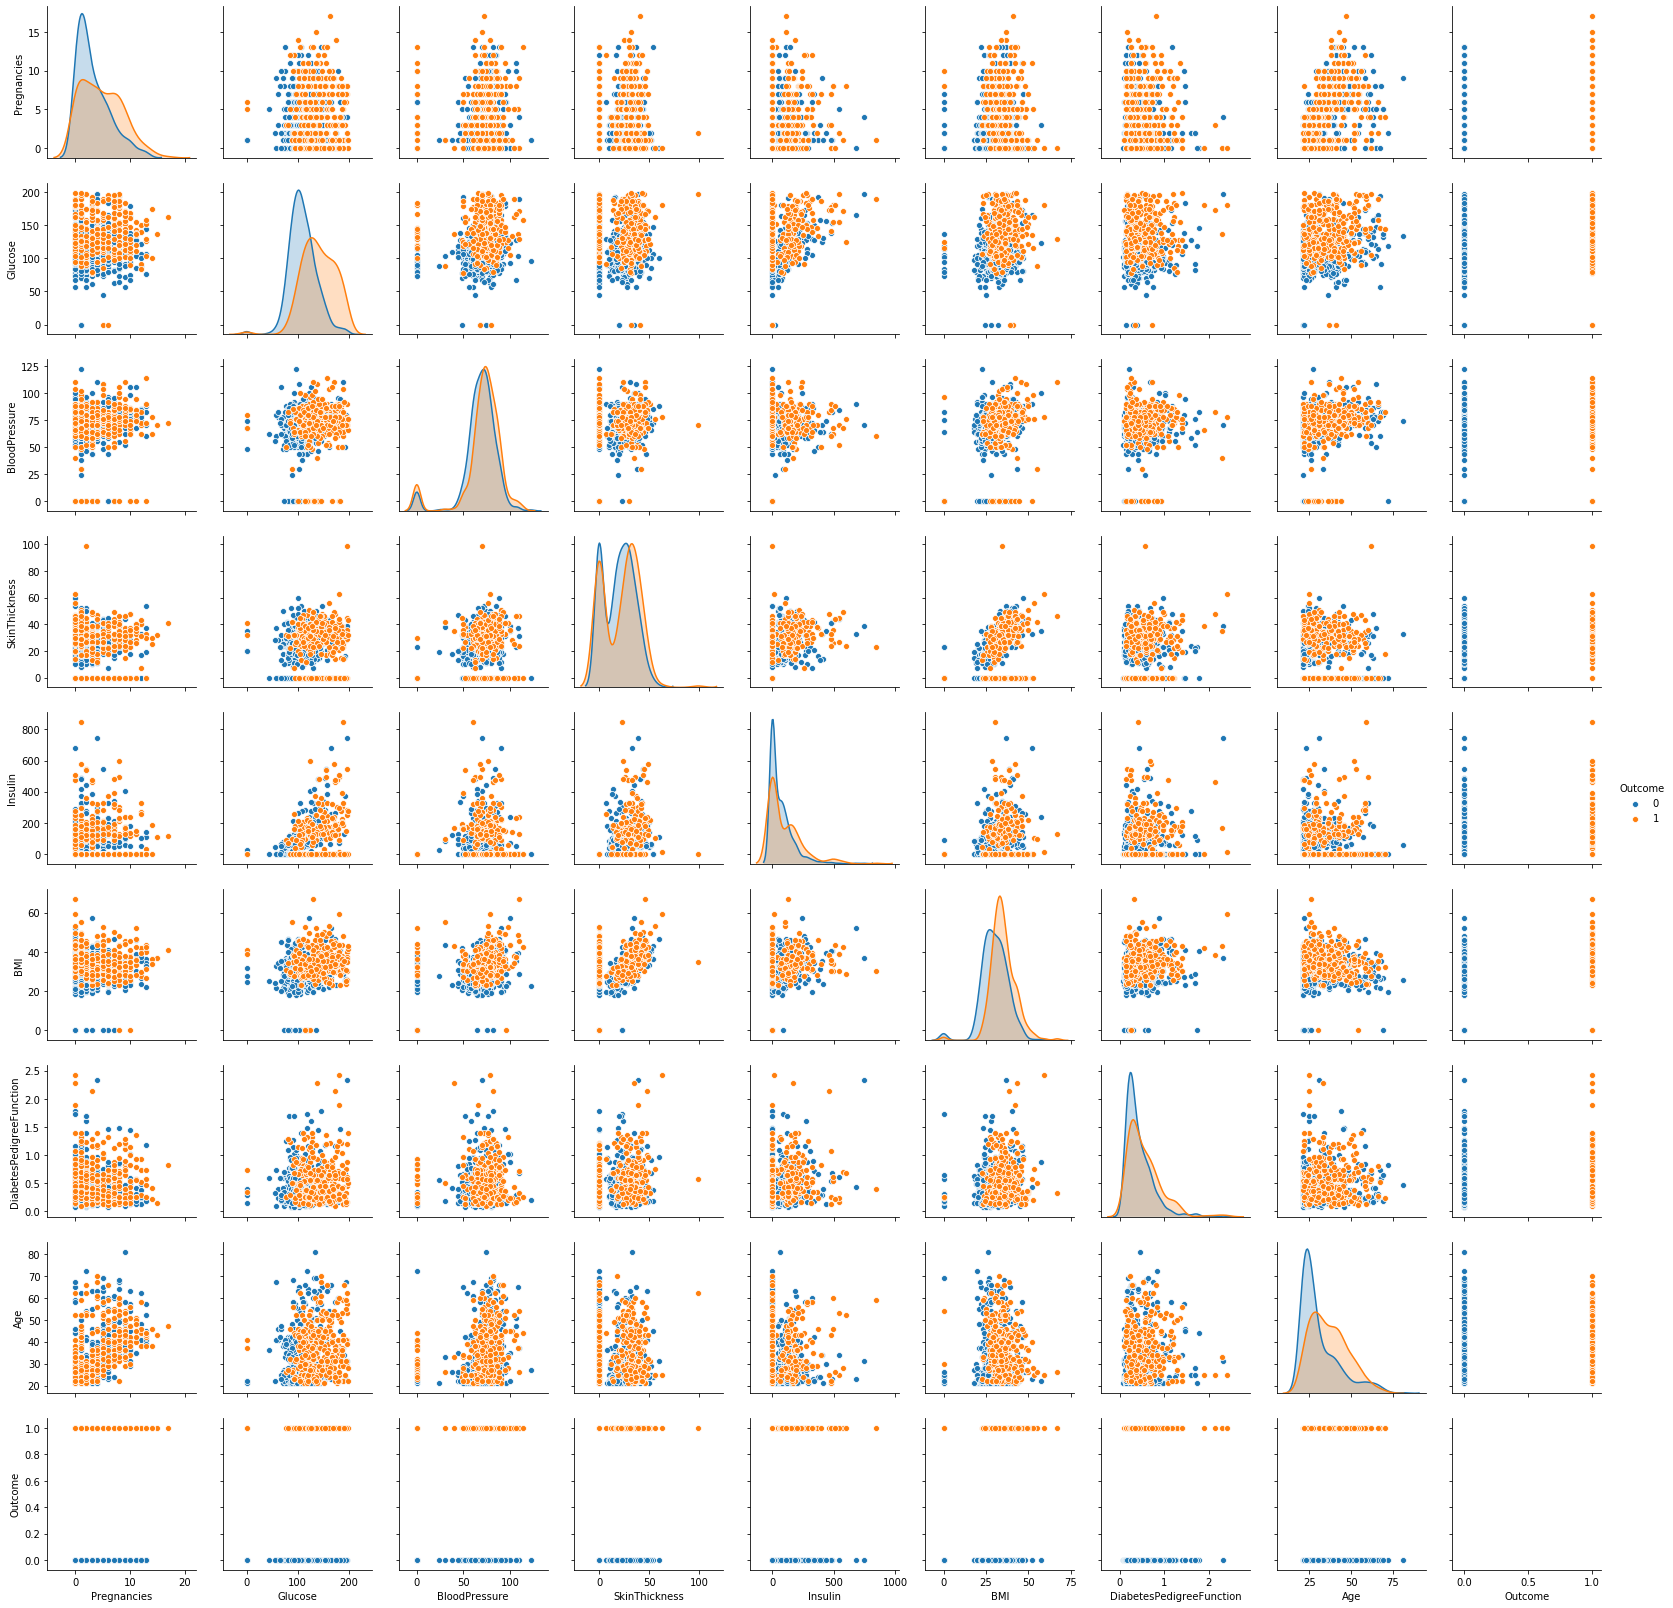

In [12]:
sns.pairplot(df, hue='Outcome')

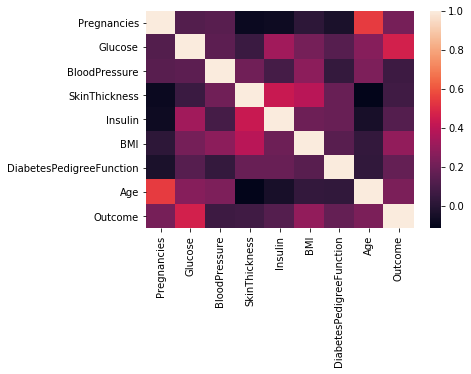

In [15]:
sns.heatmap(df.corr())

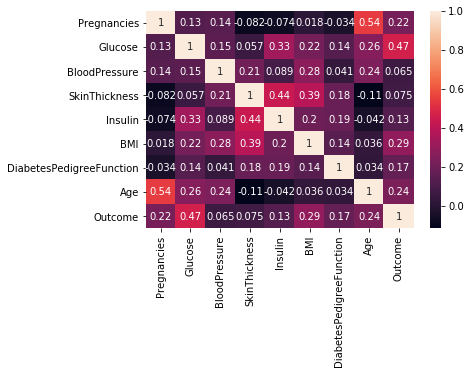

In [16]:
sns.heatmap(df.corr(), annot = True)

In [17]:

from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

sc = StandardScaler()
X = sc.fit_transform(df.drop(['Outcome'], axis=1))
y = df['Outcome'].values
y_cat = to_categorical(y)

In [18]:
X.shape

(768, 8)

In [19]:
y.shape

(768,)

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat,
                                                    random_state=22,
                                                    test_size=0.3)

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
from keras.optimizers import Adam, SGD
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import optimizers

In [38]:
model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1)
result = model.evaluate(X_test, y_test)

231/231 [==============================] - 0s 1ms/step


In [24]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 1,410
Trainable params: 1,410
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_split=0.1)

Train on 483 samples, validate on 54 samples
Epoch 1/200
483/483 [==============================] - 0s 68us/step - loss: 0.3315 - acc: 0.8302 - val_loss: 1.4171 - val_acc: 0.7037
Epoch 2/200
483/483 [==============================] - 0s 54us/step - loss: 0.3135 - acc: 0.8571 - val_loss: 1.5062 - val_acc: 0.7222
Epoch 3/200
483/483 [==============================] - 0s 56us/step - loss: 0.2983 - acc: 0.8406 - val_loss: 1.5075 - val_acc: 0.7593
Epoch 4/200
483/483 [==============================] - 0s 87us/step - loss: 0.2892 - acc: 0.8489 - val_loss: 1.2598 - val_acc: 0.7593
Epoch 5/200
483/483 [==============================] - 0s 89us/step - loss: 0.2414 - acc: 0.8634 - val_loss: 1.6212 - val_acc: 0.7407
Epoch 6/200
483/483 [==============================] - 0s 95us/step - loss: 0.2394 - acc: 0.8592 - val_loss: 1.8179 - val_acc: 0.7407
Epoch 7/200
483/483 [==============================] - 0s 85us/step - loss: 0.2530 - acc: 0.8530 - val_loss: 1.7279 - val_acc: 0.7778
Epoch 8/200
483/4

Epoch 61/200
483/483 [==============================] - 0s 171us/step - loss: 0.2165 - acc: 0.8737 - val_loss: 1.8608 - val_acc: 0.7407
Epoch 62/200
483/483 [==============================] - 0s 155us/step - loss: 0.2124 - acc: 0.8696 - val_loss: 1.9197 - val_acc: 0.7222
Epoch 63/200
483/483 [==============================] - 0s 91us/step - loss: 0.2014 - acc: 0.8778 - val_loss: 1.7249 - val_acc: 0.7407
Epoch 64/200
483/483 [==============================] - 0s 81us/step - loss: 0.2154 - acc: 0.8737 - val_loss: 1.9479 - val_acc: 0.7407
Epoch 65/200
483/483 [==============================] - 0s 87us/step - loss: 0.2441 - acc: 0.8613 - val_loss: 1.8075 - val_acc: 0.7593
Epoch 66/200
483/483 [==============================] - 0s 76us/step - loss: 0.2857 - acc: 0.8385 - val_loss: 1.4878 - val_acc: 0.7407
Epoch 67/200
483/483 [==============================] - 0s 105us/step - loss: 0.3035 - acc: 0.8447 - val_loss: 1.5088 - val_acc: 0.7037
Epoch 68/200
483/483 [==============================

483/483 [==============================] - 0s 74us/step - loss: 0.2799 - acc: 0.8716 - val_loss: 0.9549 - val_acc: 0.7963
Epoch 122/200
483/483 [==============================] - 0s 66us/step - loss: 0.2995 - acc: 0.8654 - val_loss: 1.3394 - val_acc: 0.8148
Epoch 123/200
483/483 [==============================] - 0s 89us/step - loss: 0.2802 - acc: 0.8489 - val_loss: 1.4219 - val_acc: 0.7963
Epoch 124/200
483/483 [==============================] - 0s 103us/step - loss: 0.3203 - acc: 0.8509 - val_loss: 1.5280 - val_acc: 0.7963
Epoch 125/200
483/483 [==============================] - 0s 74us/step - loss: 0.3254 - acc: 0.8427 - val_loss: 1.4932 - val_acc: 0.7963
Epoch 126/200
483/483 [==============================] - 0s 76us/step - loss: 0.2462 - acc: 0.8530 - val_loss: 1.4828 - val_acc: 0.7963
Epoch 127/200
483/483 [==============================] - 0s 68us/step - loss: 0.2748 - acc: 0.8509 - val_loss: 1.6690 - val_acc: 0.7778
Epoch 128/200
483/483 [==============================] - 0s 5

Epoch 181/200
483/483 [==============================] - 0s 78us/step - loss: 0.2536 - acc: 0.8737 - val_loss: 1.6377 - val_acc: 0.7778
Epoch 182/200
483/483 [==============================] - 0s 93us/step - loss: 0.2436 - acc: 0.8654 - val_loss: 1.7366 - val_acc: 0.7407
Epoch 183/200
483/483 [==============================] - 0s 62us/step - loss: 0.2389 - acc: 0.8716 - val_loss: 2.2163 - val_acc: 0.6852
Epoch 184/200
483/483 [==============================] - 0s 93us/step - loss: 0.2162 - acc: 0.8841 - val_loss: 2.0020 - val_acc: 0.7222
Epoch 185/200
483/483 [==============================] - 0s 68us/step - loss: 0.2167 - acc: 0.8841 - val_loss: 1.9653 - val_acc: 0.7222
Epoch 186/200
483/483 [==============================] - 0s 72us/step - loss: 0.2137 - acc: 0.8861 - val_loss: 1.9598 - val_acc: 0.7407
Epoch 187/200
483/483 [==============================] - 0s 89us/step - loss: 0.2093 - acc: 0.8861 - val_loss: 2.0153 - val_acc: 0.7407
Epoch 188/200
483/483 [=========================

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


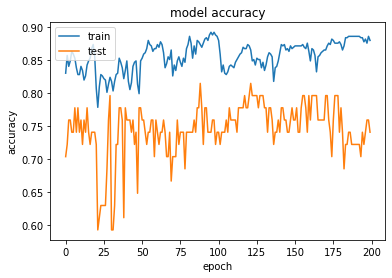

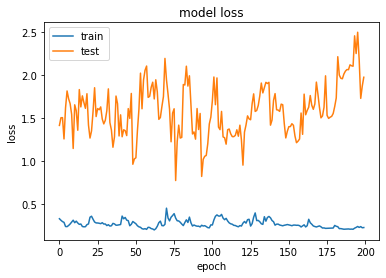

In [47]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [53]:
history = model.fit(X_train, y_train, epochs=75, verbose=1, validation_split=0.1)

Train on 483 samples, validate on 54 samples
Epoch 1/75
483/483 [==============================] - 0s 72us/step - loss: 0.2214 - acc: 0.8799 - val_loss: 2.0786 - val_acc: 0.7407
Epoch 2/75
483/483 [==============================] - 0s 56us/step - loss: 0.2127 - acc: 0.8820 - val_loss: 2.1409 - val_acc: 0.7407
Epoch 3/75
483/483 [==============================] - 0s 54us/step - loss: 0.2206 - acc: 0.8778 - val_loss: 1.9902 - val_acc: 0.7407
Epoch 4/75
483/483 [==============================] - 0s 116us/step - loss: 0.2386 - acc: 0.8758 - val_loss: 1.6045 - val_acc: 0.7778
Epoch 5/75
483/483 [==============================] - 0s 66us/step - loss: 0.2532 - acc: 0.8654 - val_loss: 1.6732 - val_acc: 0.7407
Epoch 6/75
483/483 [==============================] - 0s 83us/step - loss: 0.2588 - acc: 0.8634 - val_loss: 1.5326 - val_acc: 0.7778
Epoch 7/75
483/483 [==============================] - 0s 83us/step - loss: 0.2544 - acc: 0.8551 - val_loss: 1.7464 - val_acc: 0.7778
Epoch 8/75
483/483 [===

483/483 [==============================] - 0s 78us/step - loss: 0.2420 - acc: 0.8634 - val_loss: 2.1227 - val_acc: 0.7037
Epoch 62/75
483/483 [==============================] - 0s 81us/step - loss: 0.2366 - acc: 0.8737 - val_loss: 1.7982 - val_acc: 0.7407
Epoch 63/75
483/483 [==============================] - 0s 97us/step - loss: 0.2397 - acc: 0.8716 - val_loss: 2.0595 - val_acc: 0.7222
Epoch 64/75
483/483 [==============================] - 0s 78us/step - loss: 0.2308 - acc: 0.8737 - val_loss: 2.1052 - val_acc: 0.7222
Epoch 65/75
483/483 [==============================] - 0s 91us/step - loss: 0.2406 - acc: 0.8737 - val_loss: 1.8415 - val_acc: 0.7407
Epoch 66/75
483/483 [==============================] - 0s 97us/step - loss: 0.2327 - acc: 0.8758 - val_loss: 2.0307 - val_acc: 0.7407
Epoch 67/75
483/483 [==============================] - 0s 83us/step - loss: 0.2685 - acc: 0.8737 - val_loss: 1.9711 - val_acc: 0.7407
Epoch 68/75
483/483 [==============================] - 0s 85us/step - loss

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


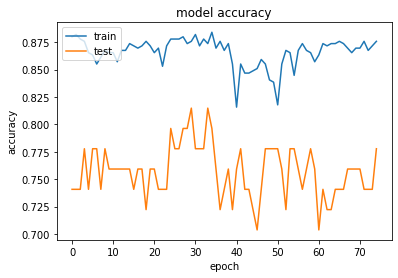

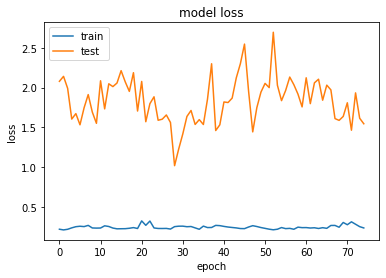

In [54]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
y_pred = model.predict(X_test)

In [60]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [62]:
pd.Series(y_test_class).value_counts() / len(y_test_class)

accuracy_score(y_test_class, y_pred_class)

0.7359307359307359

In [63]:
print(confusion_matrix(y_test_class, y_pred_class))
print('\n')
print(classification_report(y_test_class, y_pred_class))

[[132  18]
 [ 43  38]]


              precision    recall  f1-score   support

           0       0.75      0.88      0.81       150
           1       0.68      0.47      0.55        81

    accuracy                           0.74       231
   macro avg       0.72      0.67      0.68       231
weighted avg       0.73      0.74      0.72       231

